# Configuration

In [1]:
# Parameters
PROJECT_NAME = 'ML1010-Group-Project'
ENABLE_COLAB = True

#Root Machine Learning Directory. Projects appear underneath
GOOGLE_DRIVE_MOUNT = '/content/gdrive' 
COLAB_ROOT_DIR = GOOGLE_DRIVE_MOUNT + '/MyDrive/Colab Notebooks'
COLAB_INIT_DIR = COLAB_ROOT_DIR + '/utility_files'

LOCAL_ROOT_DIR = '/home/magni/Documents/ML_Projects'
LOCAL_INIT_DIR = LOCAL_ROOT_DIR + '/utility_files'

# Bootstrap Environment

In [2]:
#add in support for utility file directory and importing
import sys
import os

if ENABLE_COLAB:
  #Need access to drive
  from google.colab import drive
  drive.mount(GOOGLE_DRIVE_MOUNT, force_remount=True)
  
  #add in utility directory to syspath to import 
  INIT_DIR = COLAB_INIT_DIR
  sys.path.append(os.path.abspath(INIT_DIR))
  
  #Config environment variables
  ROOT_DIR = COLAB_ROOT_DIR
  
else:
  #add in utility directory to syspath to import
  INIT_DIR = LOCAL_INIT_DIR
  sys.path.append(os.path.abspath(INIT_DIR))
  
  #Config environment variables
  ROOT_DIR = LOCAL_ROOT_DIR

#Import Utility Support
from jarvis import Jarvis
jarvis = Jarvis(ROOT_DIR, PROJECT_NAME)

import mv_python_utils as mvutils

Mounted at /content/gdrive
Wha...where am I?
I am awake now.

I have set your current working directory to /content/gdrive/MyDrive/Colab Notebooks/ML1010-Group-Project
The current time is 11:17
Hello sir. Extra caffeine may help.



# Setup Runtime Environment

In [3]:
if ENABLE_COLAB:
  #!pip install scipy -q
  #!pip install scikit-learn -q
  #!pip install pycaret -q
  #!pip install matplotlib -q
  #!pip install joblib -q
  #!pip install pandasql -q
  !pip install umap_learn -q
  !pip install sentence_transformers -q

  display('Google Colab enabled')
else:
  display('Google Colab not enabled')

#Common imports
import json
import pandas as pd
import numpy as np
import matplotlib
import re
import nltk
import matplotlib.pyplot as plt

nltk.download('stopwords')
%matplotlib inline

'Google Colab enabled'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load Data

In [4]:
jarvis.showProjectDataFiles()
data = pd.read_pickle(jarvis.DATA_DIR + "/02_working/02_NLP_ReviewTextData.pkl")

mvutils.exploreDataframe (data)

Here are all your project data files
[D] /content/gdrive/MyDrive/Colab Notebooks/data/ML1010-Group-Project
----->** No files **

[D] /content/gdrive/MyDrive/Colab Notebooks/data/ML1010-Group-Project/01_original
---[   gz][ json]--> Cell_Phones_and_Accessories_5.json.gz (161.24 MB)
---[   gz][ json]--> meta_Cell_Phones_and_Accessories.json.gz (343.33 MB)

[D] /content/gdrive/MyDrive/Colab Notebooks/data/ML1010-Group-Project/02_working
[*][  pkl]---------> 02_Cellphone.pkl (46.32 MB)
[*][  pkl]---------> 02_NLP_ReviewTextData.pkl (87.00 MB)
[*][  pkl]---------> 02_NLP_SummaryData.pkl (8.32 MB)
[*][  pkl]---------> 02_NLP_TitleData.pkl (16.71 MB)

[D] /content/gdrive/MyDrive/Colab Notebooks/data/ML1010-Group-Project/03_train
----->** No files **

[D] /content/gdrive/MyDrive/Colab Notebooks/data/ML1010-Group-Project/04_test
----->** No files **

dataframe shape: (63461, 9)

dataframe info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63461 entries, 0 to 63460
Data columns (total 9 co

None


Top 5 in dataframe


,uuid,reviewText,reviewText_lemma,reviewText_nouns,reviewText_adjectives,reviewText_verbs,reviewText_nav,reviewText_no_tokens,reviewText_lenText
0,0729f856-ce3f-47b8-807f-ff9c4035db49,This phone is ugly and heavy and has a terribl...,this phone be ugly and heavy and have a terrib...,phone user interface techie call Manhattan Mot...,ugly heavy terrible crazy well well well small...,drop take give want stay,phone user interface techie call Manhattan Mot...,80.0,360.0
1,7188d7ea-555e-46c7-945a-aedad841c228,This phone is ugly and heavy and has a terribl...,this phone be ugly and heavy and have a terrib...,phone user interface techie call Manhattan Mot...,ugly heavy terrible crazy well well well small...,drop take give want stay,phone user interface techie call Manhattan Mot...,80.0,360.0
2,2e500082-1402-4f7e-8295-9db960225941,I had the Samsung V205 and then I decided to t...,-PRON- have the Samsung V205 and then -PRON- d...,Samsung V205 e715 FYI people battery problem k...,few mobile great great additional little able ...,decide try must let drain charge build do will...,Samsung V205 e715 FYI people battery problem k...,503.0,2176.0
3,362c2adf-c7ae-4338-803d-dfde5101d968,I had the Samsung V205 and then I decided to t...,-PRON- have the Samsung V205 and then -PRON- d...,Samsung V205 e715 FYI people battery problem k...,few mobile great great additional little able ...,decide try must let drain charge build do will...,Samsung V205 e715 FYI people battery problem k...,503.0,2176.0
4,f78fc0b4-2a13-4fb4-ad26-0fa90bec6e5e,This is the first Samsung phone I have had and...,this be the first Samsung phone -PRON- have ha...,Samsung phone up V300 TMobile customer V300 ca...,first terrible good external well small comfor...,have measure become feed send brake take use s...,Samsung phone up V300 TMobile customer V300 ca...,346.0,1541.0



Bottom 5 in dataframe


,uuid,reviewText,reviewText_lemma,reviewText_nouns,reviewText_adjectives,reviewText_verbs,reviewText_nav,reviewText_no_tokens,reviewText_lenText
63456,f1f8e416-77b4-475b-a086-681e19b7cced,The phone was stolen could not activate at all...,the phone be steal could not activate at all ....,phone,,steal could activate tell come steal appreciate,phone steal could activate tell come steal app...,24.0,104.0
63457,21175177-d169-4fd9-b9aa-9d12410a2602,good,good,,good,,good,1.0,4.0
63458,7367c575-be5c-49f7-9cba-578449de5c05,I purchased two of them and had so many proble...,-PRON- purchase two of -PRON- and have so many...,problem screen Samsung product,many disappointing great,purchase toss glitche,problem screen Samsung product many disappoint...,35.0,180.0
63459,9d1453d7-8e91-4157-92ac-c89c4e1d72f8,excelente,excelente,excelente,,,excelente,1.0,9.0
63460,80c53191-9935-4277-a1ab-9d4b67ee9d78,This is a great Smartphone for someone who's n...,this be a great smartphone for someone who be ...,smartphone smartphone cost Samsung thing quali...,great sure cheap low few high top low able nic...,want move construct stem leave opt leave produ...,smartphone smartphone cost Samsung thing quali...,188.0,891.0


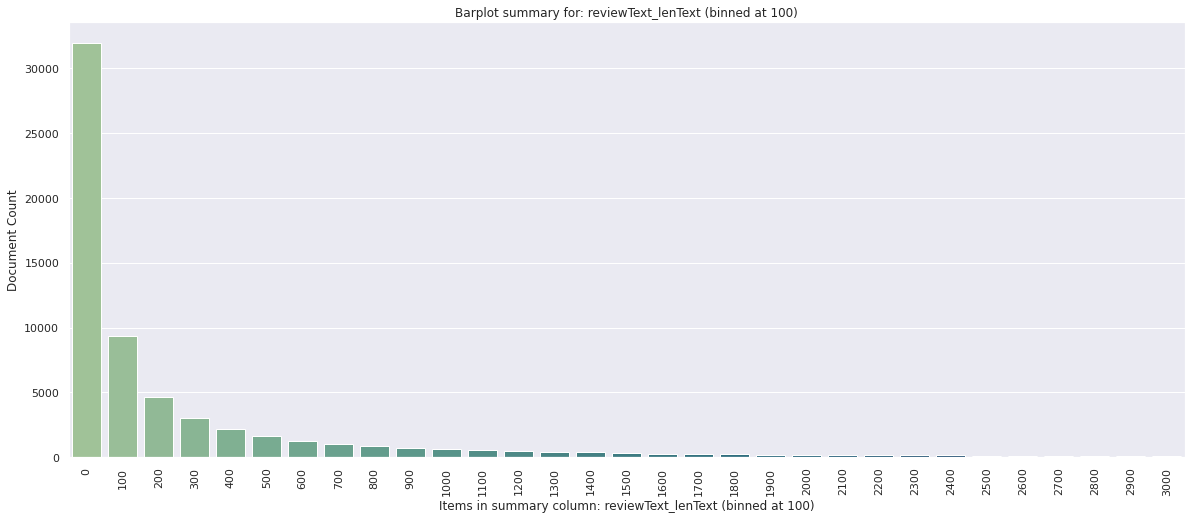

dataframe shape: (31, 2)

dataframe info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   bin_at_100   31 non-null     int64
 1   binnedCount  31 non-null     int64
dtypes: int64(2)
memory usage: 624.0 bytes


None


Top 5 in dataframe


,bin_at_100,binnedCount
0,3000,87
1,2900,104
2,2800,106
3,2700,86
4,2600,136



Bottom 5 in dataframe


,bin_at_100,binnedCount
26,400,2205
27,300,3012
28,200,4623
29,100,9329
30,0,31923


In [5]:
mvutils.examineColumnNumeric(data = data, 
                     colName = 'reviewText_lenText',
                     zoom=True,
                     minZoomLevel = 0,
                     maxZoomLevel = 3000,
                     binsize=100,
                     plotsize=5,
                     verbose=True)

In [30]:
data_core = data[['uuid','reviewText_lemma']]
mvutils.exploreDataframe (data_core)

dataframe shape: (63461, 2)

dataframe info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63461 entries, 0 to 63460
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   uuid              63461 non-null  object
 1   reviewText_lemma  63461 non-null  object
dtypes: object(2)
memory usage: 991.7+ KB


None


Top 5 in dataframe


,uuid,reviewText_lemma
0,0729f856-ce3f-47b8-807f-ff9c4035db49,this phone be ugly and heavy and have a terrib...
1,7188d7ea-555e-46c7-945a-aedad841c228,this phone be ugly and heavy and have a terrib...
2,2e500082-1402-4f7e-8295-9db960225941,-PRON- have the Samsung V205 and then -PRON- d...
3,362c2adf-c7ae-4338-803d-dfde5101d968,-PRON- have the Samsung V205 and then -PRON- d...
4,f78fc0b4-2a13-4fb4-ad26-0fa90bec6e5e,this be the first Samsung phone -PRON- have ha...



Bottom 5 in dataframe


,uuid,reviewText_lemma
63456,f1f8e416-77b4-475b-a086-681e19b7cced,the phone be steal could not activate at all ....
63457,21175177-d169-4fd9-b9aa-9d12410a2602,good
63458,7367c575-be5c-49f7-9cba-578449de5c05,-PRON- purchase two of -PRON- and have so many...
63459,9d1453d7-8e91-4157-92ac-c89c4e1d72f8,excelente
63460,80c53191-9935-4277-a1ab-9d4b67ee9d78,this be a great smartphone for someone who be ...


In [41]:
sentences = data['reviewText_lemma'][0:10000].to_list()
print("Sample sentence \n", sentences[10])

Sample sentence 
 the last year or so -PRON- have all see an explosion of nice color phone in the market .   Most of -PRON- functionality be the similar while some have the extra bonus bell and whistle while really sell the product .   like many other , -PRON- be attract to this phone because of the nice styling , the size , and the camera .   -PRON- have previously own a Samsung S105 , which be a nice phone as well so -PRON- be easy for -PRON- to learn this phone since many menu function be similar . 
 the first and foremost thing -PRON- look for in a phone be the sound quality .   the sound quality of the phone be not bad .   have own the Nokia 6610 as well -PRON- would say the Nokia phone sound a little well but this may be because -PRON- be use to the 6610 .   -PRON- be sure most people will be happy with the sound quality of the E715 . 
 the next thing be reception .   unlike the old Samsung phone this phone use an internal antenna which work good , if not well than phone with ant

# BERT

In [42]:
from sentence_transformers import SentenceTransformer
model_bert = SentenceTransformer('bert-base-nli-max-tokens')

In [43]:
embedding_bert = np.array(model_bert.encode(sentences, show_progress_bar=True))

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

In [44]:
#Bert embeddings are shape of 768
print("Bert Embedding shape", embedding_bert.shape)
print("Bert Embedding sample", embedding_bert[0][0:50])

Bert Embedding shape (10000, 768)
Bert Embedding sample [ 0.2653472   0.93428206  0.9552313   0.4684019   0.7646179   0.27416202
  2.035542    0.8353148   1.1057279   0.09725479  0.7518667   1.3980889
  1.1864377   0.08722448  0.5435522   0.41457868  1.2039768   0.42207795
  1.2388681   0.6749766   0.08903171 -0.20413446  1.5894746   0.37599483
  1.4908366   1.5612178   0.60113186  1.1260084  -0.70255667  1.1777917
  1.3135283   2.026992    0.26044574  0.7415215   1.5340629   1.2251792
  0.74721897  1.2143394   1.1834257   0.91064394  1.5216174   0.20892511
  0.4410994   0.3190017   0.5721452   0.66682935  0.65932375  0.7377815
  0.32051674  0.35158902]


In [46]:
num_topics = 15
from sklearn.cluster import KMeans
import umap.umap_ as umap
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

def predict_topics_with_kmeans(embeddings,num_topics):
  kmeans_model = KMeans(num_topics)
  kmeans_model.fit(embeddings)
  topics_labels = kmeans_model.predict(embeddings)
  return topics_labels


    
def plot_embeddings(embedding, labels,title):

    labels = np.array( labels )
    distinct_labels =  set( labels )
    
    n = len(embedding)
    counter = Counter(labels)
    for i in range(len( distinct_labels )):
        ratio = (counter[i] / n )* 100
        cluster_label = f"cluster {i}: { round(ratio,2)}"
        x = embedding[:, 0][labels == i]
        y = embedding[:, 1][labels == i]
        plt.plot(x, y, '.', alpha=0.4, label= cluster_label)
    plt.legend(title="Topic",loc = 'upper left', bbox_to_anchor=(1.01,1))
    plt.title(title)
    

def reduce_umap(embedding):
  reducer = umap.UMAP() #umap.UMAP()
  embedding_umap = reducer.fit_transform( embedding  )
  return embedding_umap

def reduce_pca(embedding):
    pca = PCA(n_components=2)
    reduced = pca.fit_transform( embedding )
    print( "pca explained_variance_ ",pca.explained_variance_)
    print( "pca explained_variance_ratio_ ",pca.explained_variance_ratio_)
    
    return reduced

def reduce_tsne(embedding):
    tsne = TSNE(n_components=2)
    reduced = tsne.fit_transform( embedding )
    
    return reduced

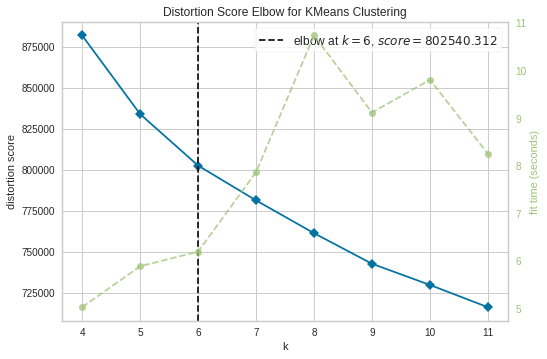

In [48]:
#yellowbrick elbow plot
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
#X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(embedding_bert)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

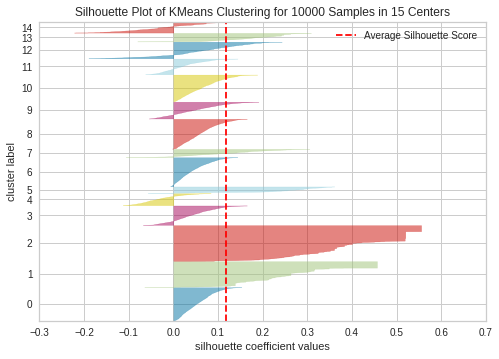

In [57]:
#yellowbrick silhouette plot
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl


# Instantiate the clustering model and visualizer
model = KMeans(15, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(embedding_bert)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

yellowbrick.cluster.icdm.InterclusterDistance

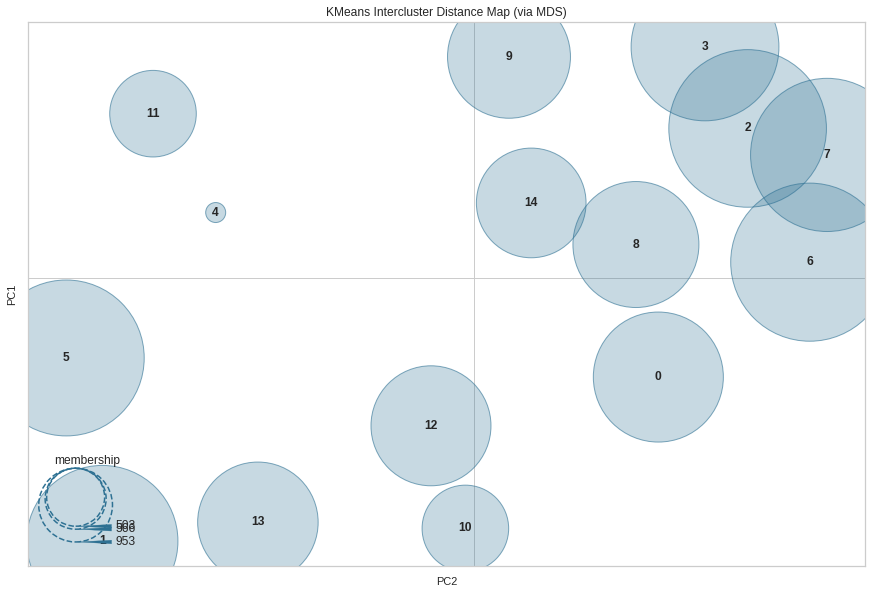

In [60]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import InterclusterDistance


# Instantiate the clustering model and visualizer
model = KMeans(15)
visualizer = InterclusterDistance(model, size=(1080, 720))
display(type(visualizer))

visualizer.fit(embedding_bert)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
#Yellowbrick classification report
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB

from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

# Load the classification dataset
X, y = load_occupancy()

# Specify the target classes
classes = ["unoccupied", "occupied"]

# Create the training and test data
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Instantiate the classification model and visualizer
model = GaussianNB()
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

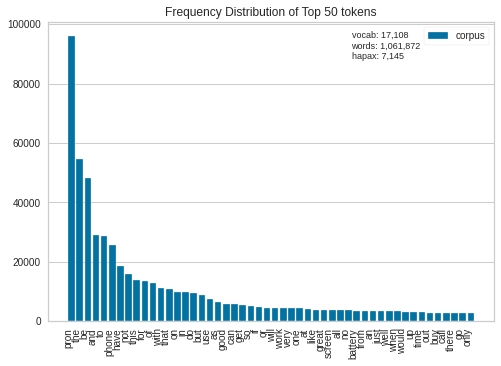

In [52]:
#Toekn frequency Distribution
from sklearn.feature_extraction.text import CountVectorizer

from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(sentences)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

In [37]:
#Apply Kmeans without dimension reduction
labels_bert_raw  = predict_topics_with_kmeans(embedding_bert,num_topics)

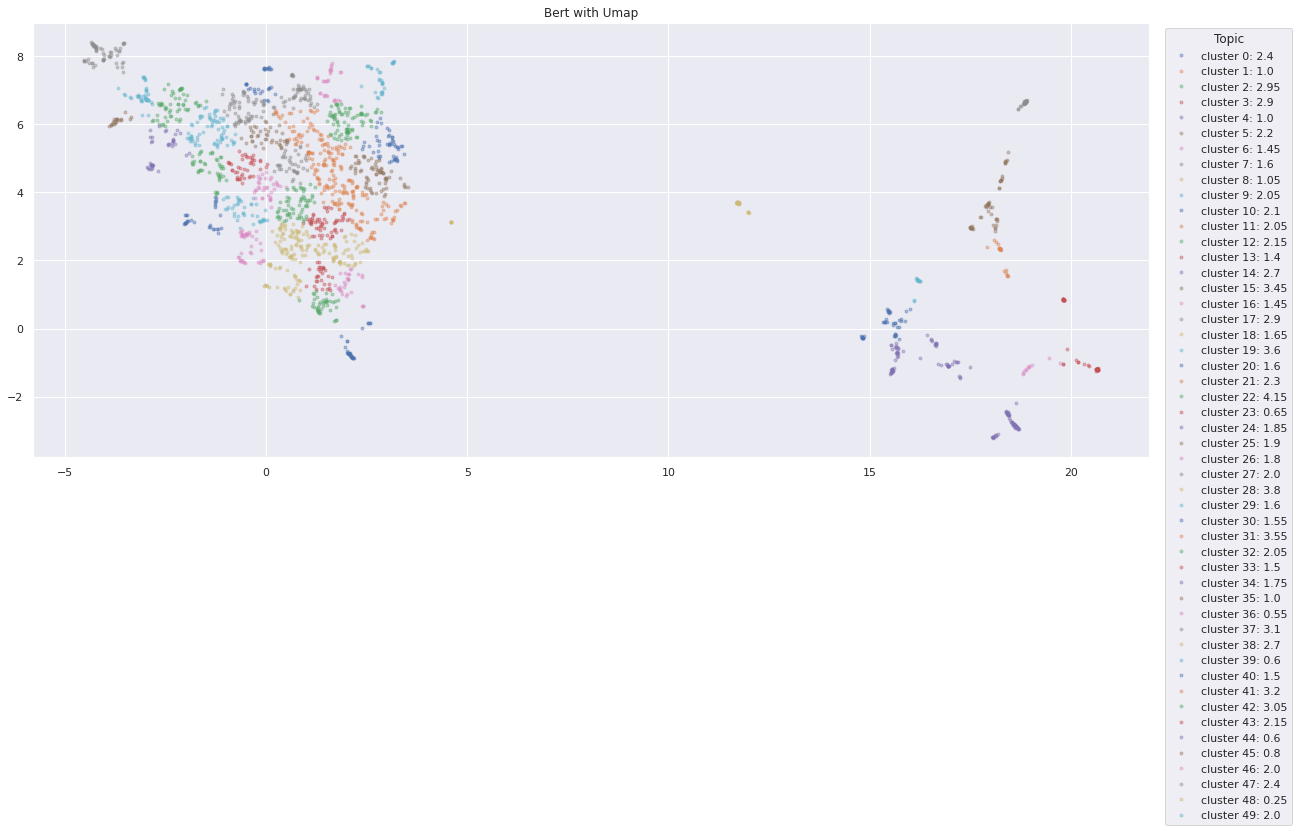

In [38]:
#Apply Kmeans for Bert Vectors  with Umap  dimension reduction

embedding_umap_bert = reduce_umap( embedding_bert )
labels_bert_umap  = predict_topics_with_kmeans(embedding_umap_bert,num_topics)
plot_embeddings(embedding_umap_bert, labels_bert_umap,"Bert with Umap")

pca explained_variance_  [56.73782  15.840426]
pca explained_variance_ratio_  [0.38285896 0.106889  ]


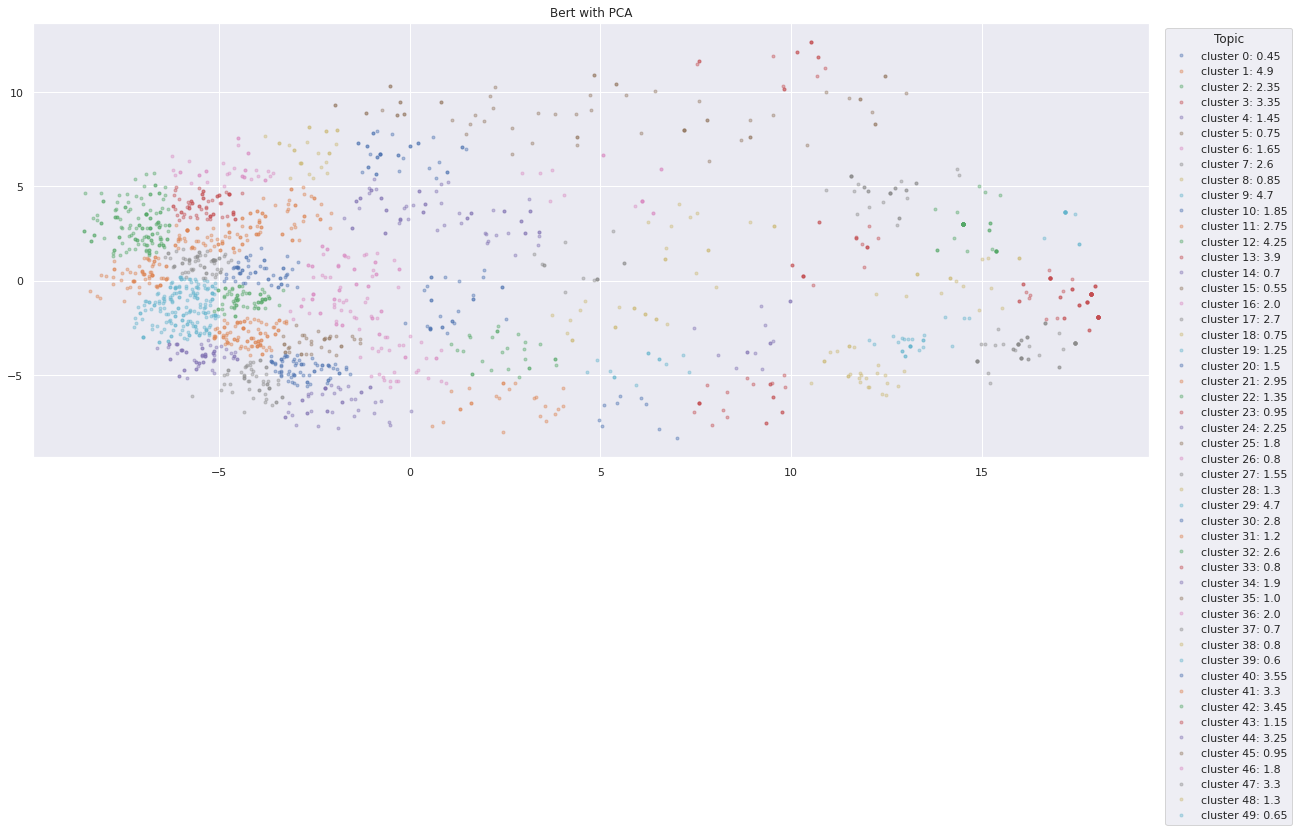

In [39]:
#Apply Kmeans for Bert Vectors  with PCA  dimension reduction

embedding_bert_pca =  reduce_pca( embedding_bert )
labels_bert_pca  = predict_topics_with_kmeans(embedding_bert_pca,num_topics)

plot_embeddings(embedding_bert_pca,labels_bert_pca,"Bert with PCA")

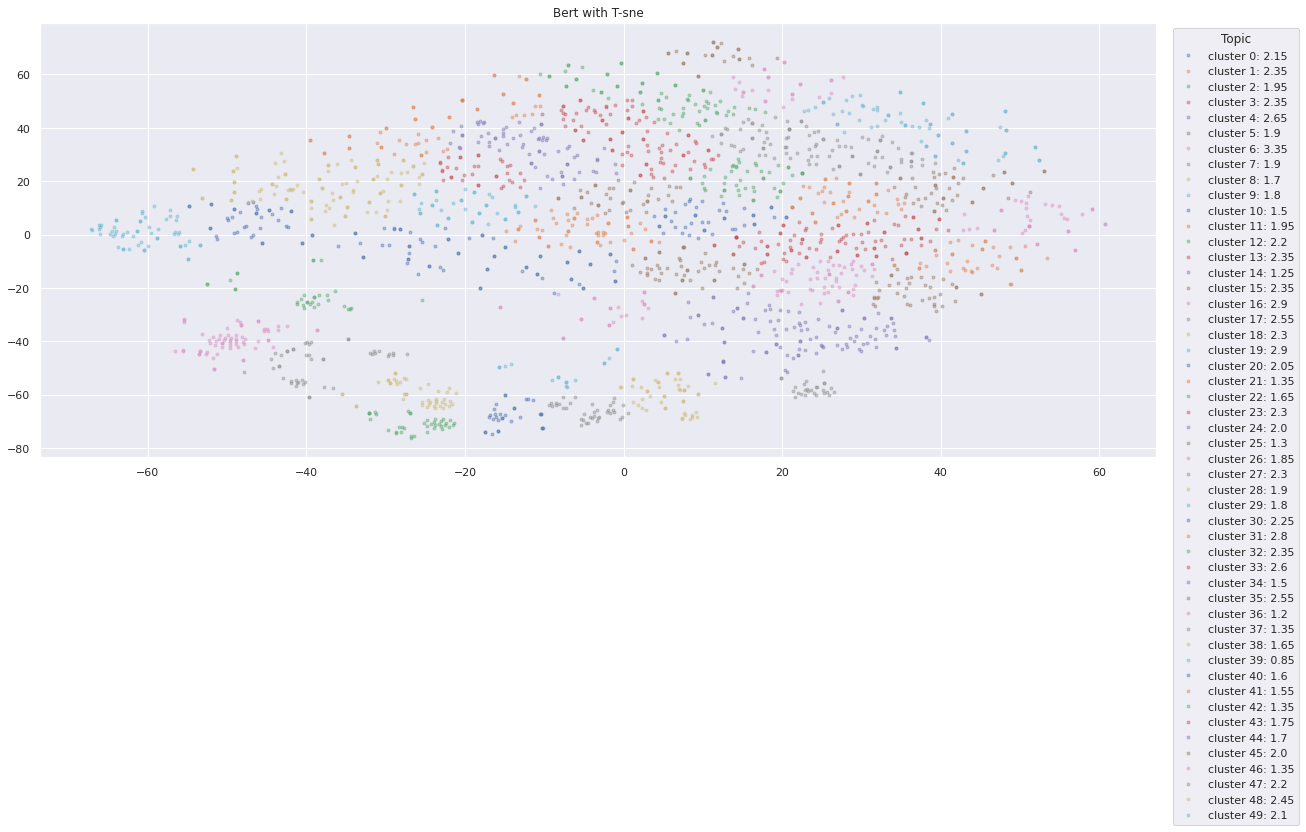

In [40]:
#Apply Kmeans for Bert Vectors  with T-sne  dimension reduction


embedding_bert_tsne =  reduce_tsne( embedding_bert )
labels_bert_tsne  = predict_topics_with_kmeans(embedding_bert_tsne,num_topics)
plot_embeddings(embedding_bert_tsne,labels_bert_tsne,"Bert with T-sne")


In [ ]:
print("Silhouette score:" )

print("Raw Bert" ,silhouette_score(embedding_bert, labels_bert_raw) )

print("Bert with PCA" ,  silhouette_score(embedding_bert_pca, labels_bert_pca) )

print("Bert with Tsne" , silhouette_score(embedding_bert_tsne, labels_bert_tsne) )


print("Bert with Umap" ,  silhouette_score(embedding_umap_bert , labels_bert_umap ) )

Silhouette score:
Raw Bert 0.07606663
Bert with PCA 0.37749687
Bert with Tsne 0.3670944
Bert with Umap 0.46691567


# BERTopic

In [7]:
!pip install bertopic -q

In [12]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(sentences)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2021-11-30 16:20:29,880 - BERTopic - Transformed documents to Embeddings
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
2021-11-30 16:20:45,139 - BERTopic - Reduced dimensionality with UMAP
2021-11-30 16:20:45,502 - BERTopic - Clustered UMAP embeddings with HDBSCAN


In [13]:
freq = topic_model.get_topic_info(); freq.head(5)

,Topic,Count,Name
0,-1,663,-1_have_not_on_with
1,0,86,0_product_quality_purchase_box
2,1,81,1_blackberry_bb_email_keyboard
3,2,78,2_smart_she_loved_bought
4,3,67,3_razr_v3_motorola_black


In [15]:
topic_model.get_topic(1)  # Select the most frequent topic

[('blackberry', 0.0237099675081831),
 ('bb', 0.009776303996453416),
 ('email', 0.009540495629773353),
 ('keyboard', 0.008440811921776979),
 ('curve', 0.008189521289893328),
 ('use', 0.008058339685824669),
 ('can', 0.00766746465122872),
 ('8900', 0.007476445987457299),
 ('camera', 0.007042343962474806),
 ('when', 0.006866296689481554)]

In [16]:
topic_model.visualize_topics()

In [19]:
new_topics, new_probs = topic_model.reduce_topics(sentences, topics, probs)

2021-11-30 16:30:02,908 - BERTopic - Reduced number of topics from 21 to 45
